In [22]:
import numpy as np
from numpy import array
import math

import pandas as pd 
from pandas import DataFrame, concat

from datetime import datetime

from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout
from keras.layers import LSTM

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

from matplotlib import pyplot

# LOADING DATA

In [23]:
#VERSION 3
input_data = pd.read_csv (r'C:/Users/Geraldo Wibowo/Desktop/Year 4/FYP/JUPYTER TEST 1/11_5_2020/input3.csv', index_col = 0)
input_data.index.name = 'Timestamp (seconds)'
#input_data = input_data.iloc[:,:1]
#print(input_data)
output_data = pd.read_csv (r'C:/Users/Geraldo Wibowo/Desktop/Year 4/FYP/JUPYTER TEST 1/11_5_2020/output3.csv', index_col = 0)
output_data.index.name = 'Timestamp (seconds)'

## Modify X and Y

In [24]:
split_columns = 1

In [25]:
# output_data = np.array(output_data)
# # print(output_data.shape)

# output_data = np.array(output_data)

# Y = list()

# for i in range((int(split_columns/2)),output_data.shape[0], split_columns):
#    Y.append(output_data[i])

# Y = array(Y)
# # print(Y.shape)

# # DECODING Y
# # integer encode direction
# encoder = LabelEncoder()
# Y = encoder.fit_transform(Y)
# # print(Y)
# Y = np.reshape(Y,(-1,1))
# # print(Y)

# scaler = MinMaxScaler()
# Y = scaler.fit_transform(Y)
# print(Y.shape)

In [26]:
#Modifying the output_data to, putting to Y in array
#1 0 0 for normal
#0 1 0 for drowsy
#0 0 1 for aggressive

output_data = np.array(output_data)

Y = list()

for i in range(int(output_data.shape[0]/split_columns)):
    condition = output_data[(i*split_columns)]    
    behavior = []
    if(condition=='DROWSY'):
        behavior = [0,1,0]
    elif(condition=='AGGRESSIVE'):
        behavior = [0,0,1]
    else:
        behavior = [1,0,0]
    
    Y.append(behavior)

Y = array(Y)
print(Y.shape)

(30929, 3)


In [27]:
#min max scaler
X = input_data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
print(X.shape)
print(Y.shape)

(30929, 28)
(30929, 3)


## Reshaping X

In [28]:
X = np.reshape(X,(int(X.shape[0]/split_columns),split_columns,X.shape[1]))
print(X.shape)

(30929, 1, 28)


## Split Training and Test Data

In [29]:
#SPLITTING TRAINING AND TEST DATA
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4)

In [30]:
#SPLITTING TRAINING AND TEST DATA
#X_train = X[:(int(X.shape[0] * 0.8)),:,:]
#X_test = X[(int(X.shape[0] * 0.8)):,:,:]
print(X_train.shape)
print(X_test.shape)
#Y_train = Y[:(int(Y.shape[0] * 0.8)),:]
#Y_test = Y[(int(Y.shape[0] * 0.8)):,:]
print(Y_train.shape)
print(Y_test.shape)

(24743, 1, 28)
(6186, 1, 28)
(24743, 3)
(6186, 3)


In [31]:
X_train = np.asarray(X_train).astype('float32')
Y_train = np.asarray(Y_train).astype('float32')

# Build LSTM Model

In [32]:
model = Sequential()
model.add(LSTM(100, activation = 'tanh' , return_sequences=True, input_shape=(X.shape[1], X.shape[2]))) 
model.add(LSTM(100, activation = 'tanh' , return_sequences=True, input_shape=(X.shape[1], X.shape[2]))) 
model.add(LSTM(100, ))
model.add(Dropout(0.3))
model.add(Dense(Y.shape[1])) #3
model.compile(optimizer='adam', loss='mae', metrics = ['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 1, 100)            51600     
_________________________________________________________________
lstm_19 (LSTM)               (None, 1, 100)            80400     
_________________________________________________________________
lstm_20 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 303       
Total params: 212,703
Trainable params: 212,703
Non-trainable params: 0
_________________________________________________________________


In [33]:
# fit network
history = model.fit(X_train, Y_train, epochs=100, validation_data=(X_test, Y_test), verbose=1, shuffle=False)

Epoch 1/100
774/774 [==============================] - 4s 5ms/step - loss: 0.3335 - accuracy: 0.4578 - val_loss: 0.3334 - val_accuracy: 0.4863
Epoch 2/100
774/774 [==============================] - 3s 4ms/step - loss: 0.3334 - accuracy: 0.4681 - val_loss: 0.3372 - val_accuracy: 0.4785
Epoch 3/100
774/774 [==============================] - 3s 4ms/step - loss: 0.3246 - accuracy: 0.4470 - val_loss: 0.3179 - val_accuracy: 0.5267
Epoch 4/100
774/774 [==============================] - 3s 4ms/step - loss: 0.3152 - accuracy: 0.4807 - val_loss: 0.2980 - val_accuracy: 0.4648
Epoch 5/100
774/774 [==============================] - 3s 4ms/step - loss: 0.2971 - accuracy: 0.5230 - val_loss: 0.2675 - val_accuracy: 0.5603
Epoch 6/100
774/774 [==============================] - 3s 4ms/step - loss: 0.2663 - accuracy: 0.6082 - val_loss: 0.2384 - val_accuracy: 0.6419
Epoch 7/100
774/774 [==============================] - 3s 4ms/step - loss: 0.2487 - accuracy: 0.6600 - val_loss: 0.2230 - val_accuracy: 0.6945

Epoch 58/100
774/774 [==============================] - 4s 5ms/step - loss: 0.0825 - accuracy: 0.9422 - val_loss: 0.0618 - val_accuracy: 0.9355
Epoch 59/100
774/774 [==============================] - 4s 5ms/step - loss: 0.0821 - accuracy: 0.9441 - val_loss: 0.0613 - val_accuracy: 0.9386
Epoch 60/100
774/774 [==============================] - 4s 6ms/step - loss: 0.0811 - accuracy: 0.9438 - val_loss: 0.0616 - val_accuracy: 0.9361
Epoch 61/100
774/774 [==============================] - 4s 5ms/step - loss: 0.0800 - accuracy: 0.9466 - val_loss: 0.0589 - val_accuracy: 0.9374
Epoch 62/100
774/774 [==============================] - 5s 6ms/step - loss: 0.0797 - accuracy: 0.9470 - val_loss: 0.0578 - val_accuracy: 0.9413
Epoch 63/100
774/774 [==============================] - 5s 6ms/step - loss: 0.0786 - accuracy: 0.9490 - val_loss: 0.0605 - val_accuracy: 0.9386
Epoch 64/100
774/774 [==============================] - 5s 6ms/step - loss: 0.0783 - accuracy: 0.9492 - val_loss: 0.0570 - val_accuracy:

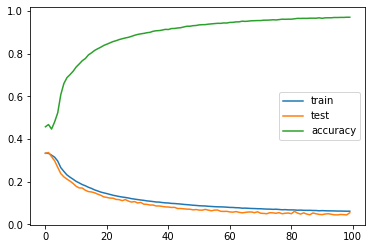

In [34]:
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.plot(history.history['accuracy'], label='accuracy')
pyplot.legend()
pyplot.show()

In [35]:
check2 = X_test.reshape((X_test.shape[0], X.shape[1], X.shape[2]))
predictions = model.predict(check2)
print(predictions.shape)
for i in range(predictions.shape[0]):
    if (predictions[i][0] >= predictions[i][1] and predictions[i][0] >= predictions[i][2]):
        predictions[i] = [1, 0, 0]
    elif (predictions[i][1] >= predictions[i][0] and predictions[i][1] >= predictions[i][2]):
        predictions[i] = [0, 1, 0]
    else:
        predictions[i] = [0, 0, 1]

        
count = 0
for i in range(predictions.shape[0]):
    if(predictions[i][0] == (Y_test[i][0]) and predictions[i][1] == (Y_test[i][1]) and predictions[i][2] == (Y_test[i][2]) ):
        count = count + 1
print('After the predictions has been estimated, the accuracy is ' + str((count/predictions.shape[0])*100) + ' %')

(6186, 3)
After the predictions has been estimated, the accuracy is 94.64920788878112 %


# K-Fold

In [16]:
kf = KFold(n_splits = 5)
list_training_error = []
list_testing_error = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    model = Sequential()
    model.add(LSTM(100, activation = 'tanh' , return_sequences=True, input_shape=(X.shape[1], X.shape[2]))) 
    model.add(LSTM(100, activation = 'tanh' , return_sequences=True, input_shape=(X.shape[1], X.shape[2]))) 
    model.add(LSTM(100, ))
    model.add(Dropout(0.2))
    model.add(Dense(Y.shape[1])) #3
    model.compile(optimizer='adam', loss='mae', metrics = ['accuracy'])
    model.fit(X_train, Y_train, epochs=100, validation_data=(X_test, Y_test), verbose=1, shuffle=False)
    y_train_data_pred = model.predict(X_train)
    y_test_data_pred = model.predict(X_test)
    fold_training_error = mean_absolute_error(y_train, y_train_data_pred) 
    fold_testing_error = mean_absolute_error(y_test, y_test_data_pred)
    list_training_error.append(fold_training_error)
    list_testing_error.append(fold_testing_error)

Epoch 1/100
774/774 [==============================] - 6s 7ms/step - loss: 0.3335 - accuracy: 0.3655 - val_loss: 0.3334 - val_accuracy: 0.4298
Epoch 2/100
774/774 [==============================] - 4s 5ms/step - loss: 0.3334 - accuracy: 0.3643 - val_loss: 0.3334 - val_accuracy: 0.3244
Epoch 3/100
774/774 [==============================] - 4s 5ms/step - loss: 0.3334 - accuracy: 0.3733 - val_loss: 0.3335 - val_accuracy: 0.2460
Epoch 4/100
774/774 [==============================] - 4s 5ms/step - loss: 0.3334 - accuracy: 0.3629 - val_loss: 0.3334 - val_accuracy: 0.4298
Epoch 5/100
774/774 [==============================] - 4s 5ms/step - loss: 0.3334 - accuracy: 0.3715 - val_loss: 0.3334 - val_accuracy: 0.4298
Epoch 6/100
774/774 [==============================] - 4s 5ms/step - loss: 0.3334 - accuracy: 0.3715 - val_loss: 0.3335 - val_accuracy: 0.2460
Epoch 7/100
774/774 [==============================] - 4s 5ms/step - loss: 0.3334 - accuracy: 0.3663 - val_loss: 0.3334 - val_accuracy: 0.4298

Epoch 58/100
774/774 [==============================] - 5s 6ms/step - loss: 0.3334 - accuracy: 0.3640 - val_loss: 0.3334 - val_accuracy: 0.3241
Epoch 59/100
774/774 [==============================] - 5s 6ms/step - loss: 0.3334 - accuracy: 0.3600 - val_loss: 0.3334 - val_accuracy: 0.4298
Epoch 60/100
774/774 [==============================] - 4s 6ms/step - loss: 0.3334 - accuracy: 0.3683 - val_loss: 0.3334 - val_accuracy: 0.4298
Epoch 61/100
774/774 [==============================] - 4s 6ms/step - loss: 0.3334 - accuracy: 0.3641 - val_loss: 0.3334 - val_accuracy: 0.4298
Epoch 62/100
774/774 [==============================] - 5s 6ms/step - loss: 0.3334 - accuracy: 0.3679 - val_loss: 0.3334 - val_accuracy: 0.3241
Epoch 63/100
774/774 [==============================] - 5s 6ms/step - loss: 0.3334 - accuracy: 0.3518 - val_loss: 0.3334 - val_accuracy: 0.3241
Epoch 64/100
774/774 [==============================] - 5s 6ms/step - loss: 0.3334 - accuracy: 0.3689 - val_loss: 0.3335 - val_accuracy:

Epoch 15/100
774/774 [==============================] - 5s 7ms/step - loss: 0.3334 - accuracy: 0.3696 - val_loss: 0.3335 - val_accuracy: 0.3243
Epoch 16/100
774/774 [==============================] - 5s 6ms/step - loss: 0.3334 - accuracy: 0.3521 - val_loss: 0.3334 - val_accuracy: 0.4298
Epoch 17/100
774/774 [==============================] - 5s 6ms/step - loss: 0.3334 - accuracy: 0.3700 - val_loss: 0.3334 - val_accuracy: 0.2460
Epoch 18/100
774/774 [==============================] - 5s 6ms/step - loss: 0.3334 - accuracy: 0.3722 - val_loss: 0.3334 - val_accuracy: 0.4298
Epoch 19/100
774/774 [==============================] - 5s 6ms/step - loss: 0.3334 - accuracy: 0.3604 - val_loss: 0.3334 - val_accuracy: 0.2460
Epoch 20/100
774/774 [==============================] - 5s 6ms/step - loss: 0.3334 - accuracy: 0.3743 - val_loss: 0.3334 - val_accuracy: 0.4298
Epoch 21/100
774/774 [==============================] - 5s 6ms/step - loss: 0.3334 - accuracy: 0.3755 - val_loss: 0.3334 - val_accuracy:

Epoch 72/100
774/774 [==============================] - 4s 5ms/step - loss: 0.3334 - accuracy: 0.3609 - val_loss: 0.3334 - val_accuracy: 0.3241
Epoch 73/100
774/774 [==============================] - 4s 5ms/step - loss: 0.3334 - accuracy: 0.3659 - val_loss: 0.3334 - val_accuracy: 0.4298
Epoch 74/100
774/774 [==============================] - 4s 5ms/step - loss: 0.3334 - accuracy: 0.3719 - val_loss: 0.3335 - val_accuracy: 0.4298
Epoch 75/100
774/774 [==============================] - 4s 5ms/step - loss: 0.3334 - accuracy: 0.3575 - val_loss: 0.3334 - val_accuracy: 0.4298
Epoch 76/100
774/774 [==============================] - 4s 5ms/step - loss: 0.3334 - accuracy: 0.3692 - val_loss: 0.3334 - val_accuracy: 0.4298
Epoch 77/100
774/774 [==============================] - 4s 5ms/step - loss: 0.3334 - accuracy: 0.3655 - val_loss: 0.3333 - val_accuracy: 0.3241
Epoch 78/100
774/774 [==============================] - 4s 5ms/step - loss: 0.3334 - accuracy: 0.3729 - val_loss: 0.3334 - val_accuracy:

Epoch 29/100
774/774 [==============================] - 4s 5ms/step - loss: 0.3334 - accuracy: 0.3645 - val_loss: 0.3334 - val_accuracy: 0.4298
Epoch 30/100
774/774 [==============================] - 4s 5ms/step - loss: 0.3334 - accuracy: 0.3668 - val_loss: 0.3334 - val_accuracy: 0.4298
Epoch 31/100
774/774 [==============================] - 4s 5ms/step - loss: 0.3334 - accuracy: 0.3762 - val_loss: 0.3334 - val_accuracy: 0.2460
Epoch 32/100
774/774 [==============================] - 4s 5ms/step - loss: 0.3334 - accuracy: 0.3629 - val_loss: 0.3334 - val_accuracy: 0.3241
Epoch 33/100
774/774 [==============================] - 4s 5ms/step - loss: 0.3334 - accuracy: 0.3637 - val_loss: 0.3335 - val_accuracy: 0.2460
Epoch 34/100
774/774 [==============================] - 4s 5ms/step - loss: 0.3334 - accuracy: 0.3702 - val_loss: 0.3335 - val_accuracy: 0.3241
Epoch 35/100
774/774 [==============================] - 4s 5ms/step - loss: 0.3334 - accuracy: 0.3669 - val_loss: 0.3334 - val_accuracy:

Epoch 86/100
774/774 [==============================] - 4s 5ms/step - loss: 0.3334 - accuracy: 0.3732 - val_loss: 0.3334 - val_accuracy: 0.4298
Epoch 87/100
774/774 [==============================] - 4s 5ms/step - loss: 0.3334 - accuracy: 0.3599 - val_loss: 0.3334 - val_accuracy: 0.4298
Epoch 88/100
774/774 [==============================] - 3s 4ms/step - loss: 0.3334 - accuracy: 0.3686 - val_loss: 0.3335 - val_accuracy: 0.2460
Epoch 89/100
774/774 [==============================] - 3s 4ms/step - loss: 0.3334 - accuracy: 0.3723 - val_loss: 0.3334 - val_accuracy: 0.4298
Epoch 90/100
774/774 [==============================] - 3s 4ms/step - loss: 0.3334 - accuracy: 0.3669 - val_loss: 0.3334 - val_accuracy: 0.4298
Epoch 91/100
774/774 [==============================] - 3s 4ms/step - loss: 0.3334 - accuracy: 0.3714 - val_loss: 0.3334 - val_accuracy: 0.4298
Epoch 92/100
774/774 [==============================] - 3s 4ms/step - loss: 0.3334 - accuracy: 0.3666 - val_loss: 0.3334 - val_accuracy:

Epoch 43/100
774/774 [==============================] - 3s 4ms/step - loss: 0.3334 - accuracy: 0.3688 - val_loss: 0.3334 - val_accuracy: 0.4298
Epoch 44/100
774/774 [==============================] - 3s 4ms/step - loss: 0.3334 - accuracy: 0.3657 - val_loss: 0.3334 - val_accuracy: 0.3241
Epoch 45/100
774/774 [==============================] - 3s 4ms/step - loss: 0.3334 - accuracy: 0.3643 - val_loss: 0.3334 - val_accuracy: 0.2460
Epoch 46/100
774/774 [==============================] - 3s 4ms/step - loss: 0.3334 - accuracy: 0.3715 - val_loss: 0.3337 - val_accuracy: 0.2460
Epoch 47/100
774/774 [==============================] - 3s 4ms/step - loss: 0.3334 - accuracy: 0.3659 - val_loss: 0.3334 - val_accuracy: 0.4298
Epoch 48/100
774/774 [==============================] - 3s 4ms/step - loss: 0.3334 - accuracy: 0.3690 - val_loss: 0.3334 - val_accuracy: 0.4298
Epoch 49/100
774/774 [==============================] - 3s 4ms/step - loss: 0.3334 - accuracy: 0.3684 - val_loss: 0.3334 - val_accuracy:

Epoch 100/100
774/774 [==============================] - 3s 4ms/step - loss: 0.3334 - accuracy: 0.3627 - val_loss: 0.3334 - val_accuracy: 0.4298


ValueError: Data cardinality is ambiguous:
  x sizes: 24744
  y sizes: 24743
Please provide data which shares the same first dimension.

In [20]:
np.array(list_training_error)

array([0.33351233, 0.33349099, 0.33349537, 0.33339687])

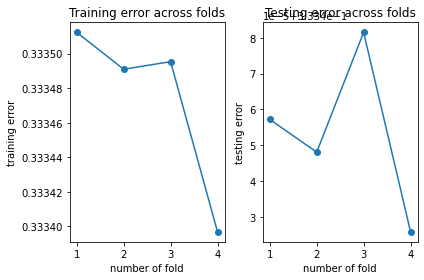

In [21]:
from matplotlib import pyplot as plt
plt.subplot(1,2,1)
plt.plot(range(1, kf.get_n_splits()), np.array(list_training_error).ravel(), 'o-')
plt.xlabel('number of fold')
plt.ylabel('training error')
plt.title('Training error across folds')
plt.tight_layout()
plt.subplot(1,2,2)
plt.plot(range(1, kf.get_n_splits()), np.array(list_testing_error).ravel(), 'o-')
plt.xlabel('number of fold')
plt.ylabel('testing error')
plt.title('Testing error across folds')
plt.tight_layout()
plt.show()